"""
📘 Hypothesis Testing & Confidence Intervals – Study Guide in Python
This script demonstrates:
1. Paired T-Test
2. Two-Sample Z-Test
3. One-Sample T-Test
4. Chi-Square Test for Independence
5. Confidence Intervals (T & Z)
6. Chi-Square Distribution Visualization
"""

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# =========================================================
# 1. Paired T-Test (before vs after treatment)
# =========================================================
"""
👉 Use when you measure the SAME subjects twice (before & after treatment).
   Null Hypothesis (H0): No difference between before & after.
   Alternative Hypothesis (H1): Mean difference ≠ 0
"""

In [2]:
before = np.array([112, 118, 125, 119, 121, 116, 120, 122, 117, 124])
after  = np.array([120, 123, 130, 125, 126, 122, 124, 127, 121, 129])

t_val, p_val = st.ttest_rel(before, after)
print("1) Paired T-Test")
print(f"   Test statistic: {t_val:.3f}, p-value: {p_val:.6f}")
print("   Result:", "Significant change detected." if p_val < 0.05 else "No significant change.")
print("-"*60)

1) Paired T-Test
   Test statistic: -14.455, p-value: 0.000000
   Result: Significant change detected.
------------------------------------------------------------


# =========================================================
# 2. Two-Sample Z-Test (comparing two independent groups)
# =========================================================
"""
👉 Use when comparing MEANS of TWO INDEPENDENT groups with known/population variance.
   Null Hypothesis (H0): Mean_A = Mean_B
   Alternative Hypothesis (H1): Mean_A ≠ Mean_B
"""


In [3]:
mean_A, std_A, nA = 75, 10, 55
mean_B, std_B, nB = 80, 12, 65

z_stat = (mean_A - mean_B) / np.sqrt((std_A**2)/nA + (std_B**2)/nB)
z_crit = st.norm.ppf(0.975)   # 95% confidence (two-tailed)

print("2) Two-Sample Z-Test")
print(f"   Z-Score: {z_stat:.3f}, Critical Z: {z_crit:.3f}")
print("   Decision:", "Reject H0" if abs(z_stat) > z_crit else "Fail to reject H0")
print("-"*60)



2) Two-Sample Z-Test
   Z-Score: -2.490, Critical Z: 1.960
   Decision: Reject H0
------------------------------------------------------------


# =========================================================
# 3. One-Sample T-Test (sample mean vs population mean)
# =========================================================
"""
👉 Use when comparing a SAMPLE mean to a POPULATION mean.
   Null Hypothesis (H0): Sample mean = Population mean
   Alternative Hypothesis (H1): Sample mean ≠ Population mean
"""

In [4]:
population_mu = 85
sample_scores = [78, 82, 88, 95, 79, 92, 85, 88, 75, 80]

t_stat, p_val = st.ttest_1samp(sample_scores, population_mu)
print("3) One-Sample T-Test")
print(f"   T-Score: {t_stat:.3f}, p-value: {p_val:.3f}")
print("   Conclusion:", "Significant difference." if p_val < 0.05 else "Not significant.")
print("-"*60)


3) One-Sample T-Test
   T-Score: -0.390, p-value: 0.706
   Conclusion: Not significant.
------------------------------------------------------------


# =========================================================
# 4. Chi-Square Test for Independence
# =========================================================
"""
👉 Use when testing association between two categorical variables.
   Example: Did CTR (click-through rate) differ between Control vs Test group?
   Null Hypothesis (H0): CTR is the same across groups.
   Alternative Hypothesis (H1): CTR is different.
"""

In [5]:
clicks_A, impressions_A = 1200, 10000
clicks_B, impressions_B = 1500, 10000

obs = np.array([
    [clicks_A, impressions_A - clicks_A],
    [clicks_B, impressions_B - clicks_B]
])

chi2, p, dof, exp = st.chi2_contingency(obs)
print("4) Chi-Square Test")
print(f"   Chi2: {chi2:.3f}, p-value: {p:.6f}, df={dof}")
print("   Verdict:", "Significant association." if p < 0.05 else "No association detected.")
print("-"*60)

4) Chi-Square Test
   Chi2: 38.279, p-value: 0.000000, df=1
   Verdict: Significant association.
------------------------------------------------------------


# =========================================================
# 5. Confidence Interval using T-distribution
# =========================================================
"""
👉 Use when population variance is UNKNOWN and sample size is SMALL (n < 30).
   Formula: CI = x̄ ± t * (s / √n)
"""

In [6]:
x_bar, s, n = 240, 25, 12
alpha = 0.05
t_critical = st.t.ppf(1 - alpha/2, df=n-1)
margin_err = t_critical * (s/np.sqrt(n))

print("5) Confidence Interval (t-dist)")
print(f"   Mean = {x_bar}, 95% CI: ({x_bar - margin_err:.2f}, {x_bar + margin_err:.2f})")
print("-"*60)

5) Confidence Interval (t-dist)
   Mean = 240, 95% CI: (224.12, 255.88)
------------------------------------------------------------


# =========================================================
# 6. Confidence Interval using Z-distribution
# =========================================================
"""
👉 Use when population variance is KNOWN or sample size is LARGE (n ≥ 30).
   Formula: CI = x̄ ± z * (σ / √n)
"""

In [7]:
sample_mean, sigma, N = 4.63, 0.54, 60
z_critical = st.norm.ppf(0.975)  # 95% confidence
err = z_critical * (sigma / np.sqrt(N))

print("6) Confidence Interval (z-dist)")
print(f"   Mean = {sample_mean}, 95% CI: ({sample_mean - err:.3f}, {sample_mean + err:.3f})")
print("-"*60)


6) Confidence Interval (z-dist)
   Mean = 4.63, 95% CI: (4.493, 4.767)
------------------------------------------------------------


# =========================================================
# 7. Chi-Square Distribution Visualization
# =========================================================
"""
👉 Visualizing critical region helps understand the rejection area.
   Example: For df=2 and α=0.05, critical chi2 ≈ 5.99.
   Any test statistic > 5.99 → Reject H0
"""

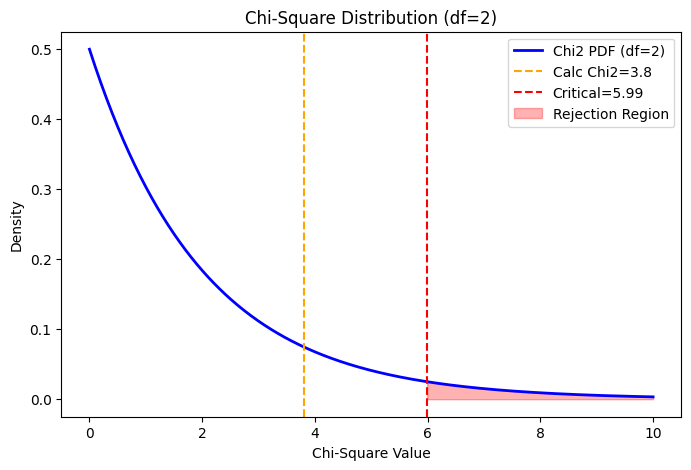

In [8]:
df = 2
critical_val = st.chi2.ppf(0.95, df)  # critical cutoff
calc_chi = 3.8  # pretend test statistic

x = np.linspace(0, 10, 500)
y = st.chi2.pdf(x, df)

plt.figure(figsize=(8,5))
plt.plot(x, y, 'b-', lw=2, label=f"Chi2 PDF (df={df})")
plt.axvline(calc_chi, color='orange', linestyle='--', label=f"Calc Chi2={calc_chi}")
plt.axvline(critical_val, color='red', linestyle='--', label=f"Critical={critical_val:.2f}")
plt.fill_between(x, y, where=(x > critical_val), color='red', alpha=0.3, label="Rejection Region")
plt.title("Chi-Square Distribution (df=2)")
plt.xlabel("Chi-Square Value")
plt.ylabel("Density")
plt.legend()
plt.show()